/home/cristinvivian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:67: MatplotlibDeprecationWarning: The griddata function was deprecated in Matplotlib 2.2 and will be removed in 3.1. Use scipy.interpolate.griddata instead.


Text(0.5, 1.0, 'velocity field')

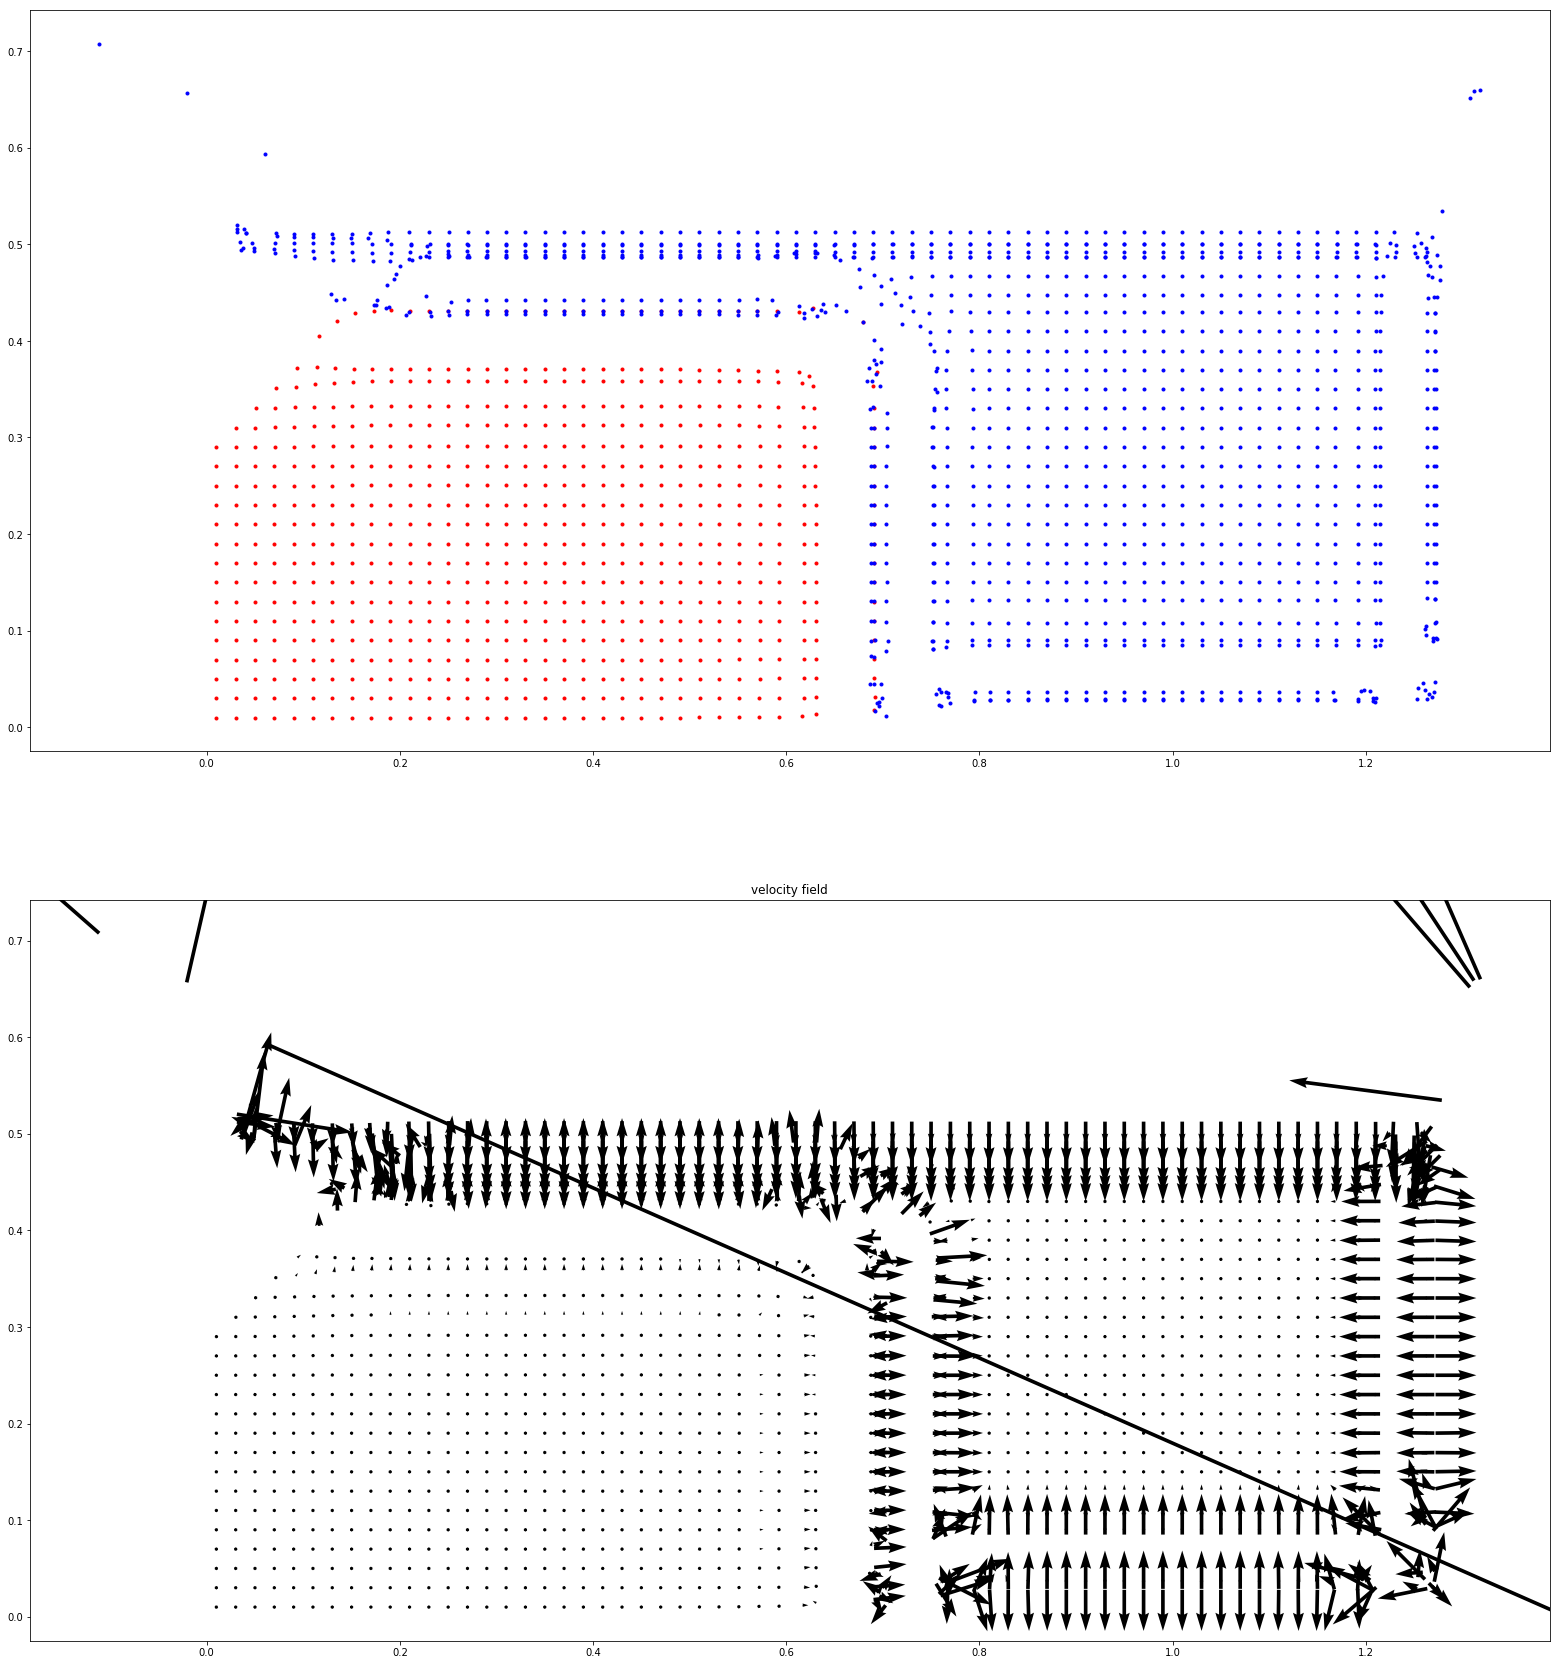

In [63]:
## import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.mlab import griddata
from numpy.random import uniform
from math import log10

npts=7680 #total number of fluid particles
#steps=2000
xl = 1.30 #size of the domain, divided by 2
yl = 0.65
data1 = np.loadtxt('../data/f_xv.dat')
data0 = np.loadtxt('../data/ini_xv.dat')
data2 = np.loadtxt('../data/xv_vp.dat',skiprows=1)
data3 = np.loadtxt('../data/kernel.dat')
exdata = np.loadtxt('../data/f_state.dat')
data4 = np.loadtxt('../data/record.dat')
data5 = np.loadtxt('../data/ini_virt.dat')
data6 = np.loadtxt('../data/f_other.dat')

x0 = data0[:,1]
y0 = data0[:,2]
x2 = data1[:,1]
y2 = data1[:,2]
u2 = data1[:,3]
v2 = data1[:,4]
x3 = data2[:,1]
y3 = data2[:,2]
u3 = data2[:,3]
v3 = data2[:,4]
x5 = data5[:,1]
y5 = data5[:,2]
kernel1 = data3[:npts,1]
itype = data6[:,1]
#kernel2 = data3[npts:,1]

fig, ax = plt.subplots(figsize=(30, 30))

#for i in range(20):
#    p1[i] = exdata[741+2*i,3]
#ax.set_title('wcsph results, fluid particle:%d,timestep:%d'%(npts,steps))
init = plt.subplot(211,aspect=1.0)
for i in range(len(x2)):
    if itype[i]==2:
        init.plot(x2[i],y2[i],'.r')
    else:
        init.plot(x2[i],y2[i],'.b')
#for i in range(len(x2)):
#    if x2[i]<=1.04:
#        init.plot(x2[i],y2[i],'.b')
#init.plot(x2,y2,'.b',10,x3,y3,'.r',10)
#init.quiver(x2,y2,u2,v2)
#init.set_title('particle distribution')
#hp = 0.
pressure = exdata[:,3]
#normarlized pressure
#for i in range(len(y2)):
#    hp = 9.8*1000*0.39
#    pressure[i] = pressure[i]/hp
density = exdata[:,2]
energy = exdata[:,4]
xi = np.linspace(0,xl,130)
yi = np.linspace(0,yl,65)
#m=np.log10(pressure)
# grid the data.
zi = griddata(x2,y2,pressure,xi,yi,interp='linear')
# contour the gridded data, plotting dots at the randomly spaced data points.
#CS = plt.subplot(211,aspect=1.0)
#im2 = CS.scatter(x2,y2,10,pressure,cmap='jet')
#im2 = CS.contour(xi,yi,zi,200,cmap=plt.cm.jet)
#fmt = ticker.LogFormatterMathtext()
#fmt.create_dummy_axis()
#CS.clabel(im2, im2.levels[::2])
#fig.colorbar(im2,ax=CS,pad=0.05)
#CS.set_title('pressure field') #both contour & scatter are used

#ccs = plt.subplot(224, aspect =1.0)
#im3 = ccs.scatter(x2,y2,10,kernel1)
#ccs.set_title('kernel scatter')

vel = plt.subplot(212,aspect=1.0)
vel.quiver(x2,y2,u2,v2)
#vel.quiver(x3,y3,u3,v3)
vel.set_title('velocity field')

# write pressure at the center line into txtfile
#p1 = pressure[741:780:2]
#mat = np.matrix(p1)
#with open('outfile-1.txt','ab') as f:
#    for line in mat:
#        np.savetxt(f,line,fmt='%.2f')

#den = plt.subplot(313,aspect=1.0)
#for i in range(len(x2)):
#    if density[i]<=1000:
#        den.scatter(x2[i],y2[i],density[i]/10)
#im3=den.scatter(x2,y2,10,density)
#fig.colorbar(ax=den,pad=0.05)

#den = plt.subplot(224)
#zii = griddata(x2,y2,pressure,xi,yi,interp='linear')
#im3 = den.contour(xi,yi,zii,200,cmap=plt.cm.jet)
#fig.colorbar(im3, ax =den,pad=0.05)
#den.set_title('density field')

/home/cristinvivian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: The griddata function was deprecated in Matplotlib 2.2 and will be removed in 3.1. Use scipy.interpolate.griddata instead.
  This is separate from the ipykernel package so we can avoid doing imports until


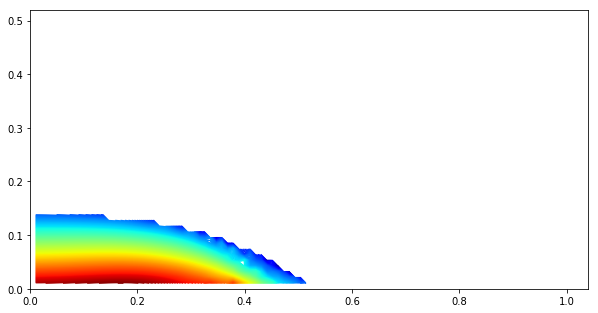

In [41]:
fig, ax = plt.subplots(figsize=(10, 10))
CS = plt.subplot(111,aspect=1.0)
zii = griddata(x2,y2,pressure,xi,yi,interp='linear')
image = plt.contour(xi,yi,zii,200,cmap=plt.cm.jet)
#image.figuresize(20,20)
#fig.colorbar(image,ax = CS,pad=0.05)
    
#print(pressure)

In [13]:
help scatter

SyntaxError: invalid syntax (<ipython-input-13-9e83b9f4772d>, line 1)

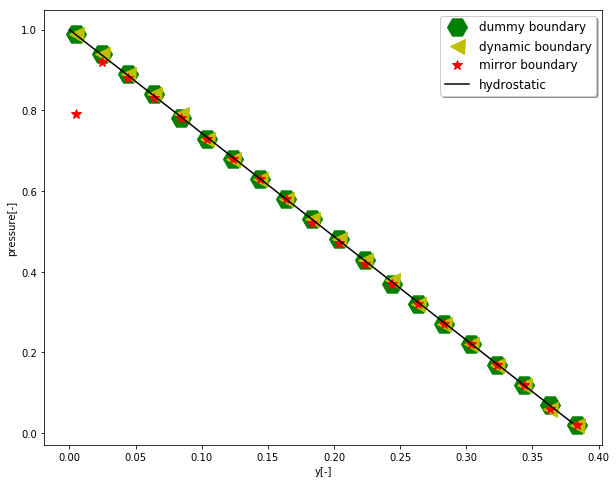

In [86]:
a = y2[741:781:2]
b = np.arange(0,0.4,0.02)
p0 = np.zeros((4,20))
tt = [0.08,0.12,0.16,0.20,0.40]
for i in range(len(tt)-1):
    cita = 0.5*(np.sin((tt[i]/0.2-0.5)*np.pi)+1)
    for j in range(20):
        p0[i,j] = cita*(0.39-b[j])/0.39
pp = np.loadtxt('outfile.txt')
ppp = np.loadtxt('outfile-1.txt')
#print(a.type())
 
#b = y2[391:431:2]

#    np.savetxt(f,p2,fmt='%.2f')

gfig, ax = plt.subplots(figsize=(10,8))
#ax.plot(a,pp[0,:],'.b',label='0.08s')
#ax.plot(a,pp[1,:],'r^',label='0.12s')
#ax.plot(a,pp[2,:],'y8',label='0.16s')
ax.plot(a,pp[3,:],'gH',markersize='20',label='dummy boundary')
#ax.plot(a,pp[4,:],'m*',label='0.40s')
ax.plot(a,ppp[0,:],'y<',markersize='15',label='dynamic boundary')
ax.plot(a,ppp[1,:],'r*',markersize='10',label='mirror boundary')
#for i in range(3):
#    ax.plot(b,p0[i,:],'k')
ax.plot(b,p0[3,:],'k',label='hydrostatic')
legend = ax.legend(loc='upper right', shadow=True, fontsize='large')
plt.ylabel('pressure[-]')
plt.xlabel('y[-]')

plt.show()


Text(0, 0.5, 'pcenter(Pa)')

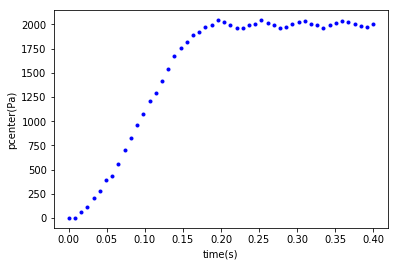

In [49]:
dt = 8.e-5
#damp = 2500*dt
time = np.linspace(dt,5000*dt,50)
#tsuita = 0.5*np.sin((time/damp-0.5)*np.pi)+0.5
pcenter = data4[:,1]
av_vel = data4[:,2]
cor_vel = data4[:,3]
plt.plot(time,pcenter,'.b')
plt.xlabel('time(s)')
plt.ylabel('pcenter(Pa)')
#plt.title('c_0=20*(gH)**(1/2)')
#print(t)

In [7]:
x = np.rand(1,10)*10
y = np.rand(1,10)*10
z = np.rand(1,10)*10
t = round(sqrt(z))*35
c = mod(round(z+2),255)/255
plt.scatter(x,y,t,c,'filled')

AttributeError: module 'numpy' has no attribute 'rand'